# Team ZM3 Sentiment analysis project 

### Members
1. Ndamulelo Innocent Nelwamondo
2. Thobekani Masondo
3. Nomvuselelo Simelane
4. John Sekgobela
5. Namhla Sokapase
6. Sandra Malope

## Problem statement

*Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.*

*With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.*

*Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.*

### To start with, lets import important packages for calling the data to the notebook and EDA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Lets now call the data

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test_with_no_labels.csv')

# The rest of the Notebook is then divided into 6 parts, namely, 1. Explanatory data analysis(EDA) and Data cleaning, 2. Data prepocessing, 3. Models, 4. Evaluation of models and 5. conclusion

# 1. Explanatory Data Analysis and Data Cleaning

In [3]:
from powerbiclient import Report, models
from io import StringIO
from ipywidgets import interact
import requests
from PIL import Image

In [4]:
print('Train dataset specifications')
print("")
train_df.info() #to see the first five rows in the train twitter dataset
print("")
print('Test dataset specifications')
print("")
test_df.info() #to see the first five rows in the test twitter dataset

Train dataset specifications

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB

Test dataset specifications

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


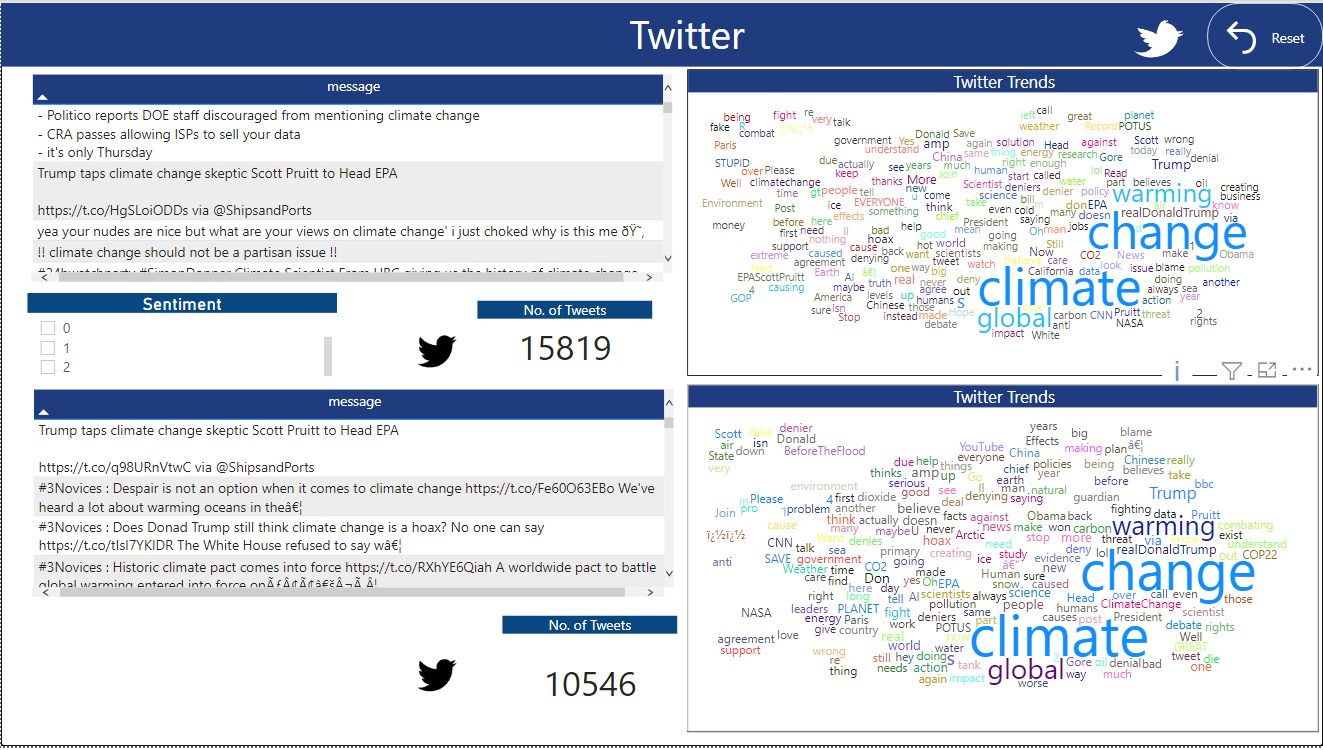

In [5]:
myImage = Image.open("eda.png") #twitter trends photo from powerbi
myImage

checking for duplicates

In [ ]:
percent_duplicates = round((1-(df['message'].nunique()/len(df['message'])))*100,2)
print('Duplicated tweets in train data:')
print(percent_duplicates,'%')

### Since we working with people thoughts, we do not need web urls, numbers, punctuations and is always good to work with lower cases of text.

In [6]:
#!pip install emoji
#!pip install vaderSentiment
#!pip install textblob

In [7]:
import string
import re # for regular expressions
import spacy
import nltk
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from emoji import UNICODE_EMOJI

In [8]:
def tweet_preprocessing(tweet):
    
    '''
    This functions cleans tweets from line breaks, URLs, numbers, etc.
    '''
    
    tweet = tweet.lower() #to lower case
    tweet = tweet.replace('\n', ' ') # remove line breaks
    tweet = tweet.replace('\@(\w*)', '') # remove mentions
    tweet = re.sub(r"\bhttps://t.co/\w+", '', tweet) # remove URLs
    tweet = re.sub('\w*\d\w*', '', tweet) # remove numbers
    tweet = re.sub(r'\#', '', tweet) # remove hashtags. To remove full hashtag: '\#(\w*)'
    tweet = re.sub('\w*\d\w*', '', tweet) # removes numbers?
    tweet = re.sub(' +', ' ', tweet) # remove 1+ spaces

    return tweet

In [9]:
def strip_emoji(text):
    
    '''
    This function removes any emojis
    '''
    
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return RE_EMOJI.sub(r'', text)

In [10]:
#applying functions to clean tweets
train_df['clean_message'] = train_df['message'].apply(tweet_preprocessing)
train_df['clean_message'] = train_df['clean_message'].apply(strip_emoji)

In [11]:
#applying functions to clean tweets
test_df['clean_message'] = test_df['message'].apply(tweet_preprocessing)
test_df['clean_message'] = test_df['clean_message'].apply(strip_emoji)

Now lets see what the data looks like after removing web-urls, punctuations and converting messages to text

In [12]:
train_df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  
0  polyscimajor epa chief doesn't think carbon di...  
1  it's not like we lack evidence of anthropogeni...  
2  rt @rawstory: researchers say we have three ye...  
3  todayinmaker wired : was a pivotal year in the...  
4  rt @soynoviodetodas: it's , and a racist, sexi...

In [13]:
test_df.head()

message  tweetid  \
0  Europe will now be looking to China to make su...   169760   
1  Combine this with the polling of staffers re c...    35326   
2  The scary, unimpeachable evidence that climate...   224985   
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263   
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928   

                                       clean_message  
0  europe will now be looking to china to make su...  
1  combine this with the polling of staffers re c...  
2  the scary, unimpeachable evidence that climate...  
3  @karoli @morgfair @osborneink @dailykos putin ...  
4  rt @fakewillmoore: 'female orgasms cause globa...

In [14]:
df=train_df

In [15]:
#Tokanizing tweets
tt = TweetTokenizer()
df['clean_message'] = df['clean_message'].apply(tt.tokenize)
test_df['clean_message'] = test_df['clean_message'].apply(tt.tokenize)

In [16]:
#Cleaning tokens
df['clean_message'] = df['clean_message'].apply(lambda x: " ".join(x for x in x if re.match(r'[^\W\d]*$', x)))
test_df['clean_message'] = test_df['clean_message'].apply(lambda x: " ".join(x for x in x if re.match(r'[^\W\d]*$', x)))

In [17]:
# Lemmatizing

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['clean_message'] = df['clean_message'].apply(lemmatize_text)
test_df['clean_message'] = test_df['clean_message'].apply(lemmatize_text)

In [18]:
df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  
0  [polyscimajor, epa, chief, think, carbon, diox...  
1  [not, like, we, lack, evidence, of, anthropoge...  
2  [rt, researcher, say, we, have, three, year, t...  
3  [todayinmaker, wired, wa, a, pivotal, year, in...  
4  [rt, and, a, racist, sexist, climate, change, ...

In [19]:
test_df.head()

message  tweetid  \
0  Europe will now be looking to China to make su...   169760   
1  Combine this with the polling of staffers re c...    35326   
2  The scary, unimpeachable evidence that climate...   224985   
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263   
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928   

                                       clean_message  
0  [europe, will, now, be, looking, to, china, to...  
1  [combine, this, with, the, polling, of, staffe...  
2  [the, scary, unimpeachable, evidence, that, cl...  
3  [putin, got, to, you, too, jill, trump, believ...  
4  [rt, female, orgasm, cause, global, warming, s...

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Belutics (pty)
[nltk_data]     Ltd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
#Removing stop words
stop = stopwords.words('english')
df['clean_message'] = df['clean_message'].apply(lambda x: " ".join(x for x in x if x not in stop))
test_df['clean_message'] = test_df['clean_message'].apply(lambda x: " ".join(x for x in x if x not in stop))

In [22]:
#Removing words that are negative but not negative in the climate setting
to_remove = ['fight', 'fighting', 'crisis', 'threat', 'threaten', 'risk', ]

df['clean_message'] = df['clean_message'].apply(lambda x: " ".join(x for x in x.split() if x not in to_remove))
test_df['clean_message'] = test_df['clean_message'].apply(lambda x: " ".join(x for x in x.split() if x not in to_remove))

In [23]:
#Removing words that are negative but not negative in the climate setting
to_remove = ['fight', 'fighting', 'crisis']

df['clean_message'] = df['clean_message'].apply(lambda x: " ".join(x for x in x.split() if x not in to_remove))
test_df['clean_message'] = test_df['clean_message'].apply(lambda x: " ".join(x for x in x.split() if x not in to_remove))

In [24]:
#sentiment with vader
analyzer = SentimentIntensityAnalyzer()

scores = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(df['clean_message'].shape[0]):
    compound = analyzer.polarity_scores(df['clean_message'][i])["compound"]
    pos = analyzer.polarity_scores(df['clean_message'][i])["pos"]
    neu = analyzer.polarity_scores(df['clean_message'][i])["neu"]
    neg = analyzer.polarity_scores(df['clean_message'][i])["neg"]
    
    scores.append({"comp": compound,
                       "positive": pos,
                       "negative": neg,
                       "neutral": neu
                  })
    
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
test_df = test_df.join(sentiments_score)

#### Lets now explore the train dataset

In [22]:
df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message    comp  positive  \
0  polyscimajor epa chief think carbon dioxide ma...  0.1531     0.127   
1    like lack evidence anthropogenic global warming  0.2023     0.436   
2  rt researcher say three year act climate chang...  0.0000     0.000   
3  todayinmaker wired wa pivotal year war climate... -0.5994     0.000   
4  rt racist sexist climate change denying bigot ... -0.7506     0.000   

   negative  neutral  
0     0.000    0.873  
1     0.245    0.319  
2     0.000    1.000  
3     0.358    0.642  
4     0.444    0.556

In [25]:
test_df.head()

message  tweetid  \
0  Europe will now be looking to China to make su...   169760   
1  Combine this with the polling of staffers re c...    35326   
2  The scary, unimpeachable evidence that climate...   224985   
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263   
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928   

                                       clean_message    comp  positive  \
0  europe looking china make sure alone climate c...  0.1531     0.127   
1  combine polling staffer climate change woman r...  0.2023     0.436   
2  scary unimpeachable evidence climate change al...  0.0000     0.000   
3  putin got jill trump believe climate change th... -0.5994     0.000   
4  rt female orgasm cause global warming sarcasti... -0.7506     0.000   

   negative  neutral  
0     0.000    0.873  
1     0.245    0.319  
2     0.000    1.000  
3     0.358    0.642  
4     0.444    0.556

Seems pretty cool to what is wanted

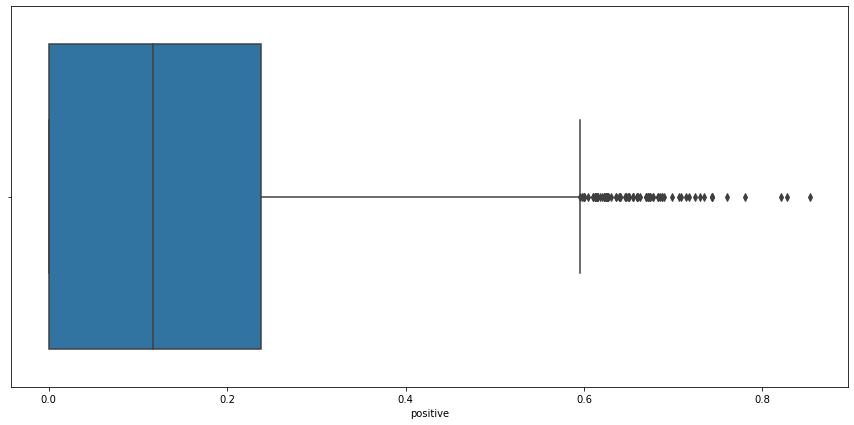

In [26]:
#distribution of polarity
plt.figure(figsize=(15, 7))
sns.boxplot(x = df['positive'])

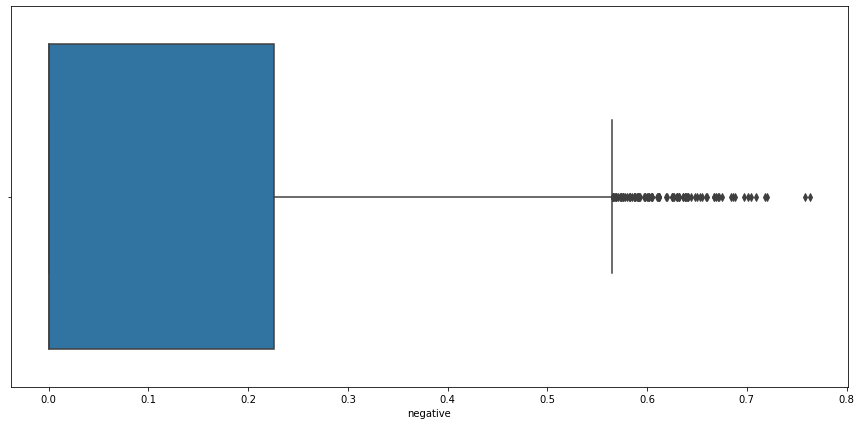

In [27]:
plt.figure(figsize=(15, 7))
sns.boxplot(x = df['negative'])

In [28]:
#Creating column with sentiment description
df['sentiment'] = np.where(df['comp'] > 0.1, 'positive', (np.where(df['comp'] < -0.1, 'negative', 'neutral')))

In [29]:
#Getting number of values in each category
sentiment_dist = df['sentiment'].value_counts().to_frame().reset_index().rename(columns={'index': 'sentiment', 'sentiment': 'count'})
sentiment_dist

sentiment  count
0  positive   5976
1  negative   5448
2   neutral   4395

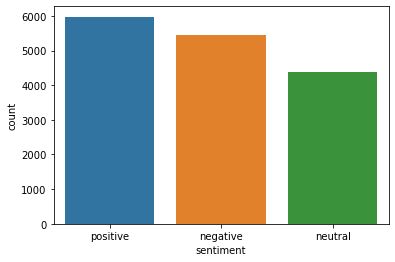

In [30]:
sns.barplot(x=sentiment_dist['sentiment'], y=sentiment_dist['count'])

### Now lets get into some interesting stuff like extracting of hashtags and mentions from twitter messaage

In [31]:
#extracting hashtags
df['hashtags'] = df['message'].str.findall(r'\#(\w*)').apply(', '.join)

In [32]:
#most popular hashtags
hashtags_popular = df.message.str.extractall(r'\#(\w*)')[0].value_counts()
#most popular mentions
mentions_popular = df.message.str.extractall(r'\@(\w*)')[0].value_counts()

In [33]:
hashtags_popular.nlargest(30)

climate             343
climatechange       153
BeforeTheFlood      137
Trump                77
COP22                75
environment          68
ParisAgreement       65
ImVotingBecause      62
ActOnClimate         42
ClimateChange        41
Ã                    39
IVotedBecause        33
globalwarming        31
auspol               29
science              27
p2                   26
MAGA                 23
news                 21
GlobalWarming        18
climatemarch         18
BeforetheFlood       17
EPA                  16
ClimateCounts        14
EarthDay             14
GreatBarrierReef     13
NoDAPL               13
qanda                12
TrumpNÃ              12
Science              12
Resist               11
Name: 0, dtype: int64

### climate was the most popular hashtag with 343 number of counts

#### Top 5 popular hashtags

###### 1. climate             343
###### 2. climatechange       153
###### 3. BeforeTheFlood      137
###### 4. Trump                77
###### 5. COP22  

#### Now lets see the head of the dataset with hashtags

In [34]:
df.head(5)

sentiment                                            message  tweetid  \
0  positive  PolySciMajor EPA chief doesn't think carbon di...   625221   
1  positive  It's not like we lack evidence of anthropogeni...   126103   
2   neutral  RT @RawStory: Researchers say we have three ye...   698562   
3  negative  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4  negative  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message    comp  positive  \
0  polyscimajor epa chief think carbon dioxide ma...  0.1531     0.127   
1    like lack evidence anthropogenic global warming  0.2023     0.436   
2  rt researcher say three year act climate chang...  0.0000     0.000   
3  todayinmaker wired wa pivotal year war climate... -0.5994     0.000   
4  rt racist sexist climate change denying bigot ... -0.7506     0.000   

   negative  neutral        hashtags  
0     0.000    0.873                  
1     0.245    0.319                  
2     0.000    1.000                  
3     0.358    0.642  TodayinMaker,   
4     0.444    0.556   ElectionNight

#### Now lets define a function that will generate all the popular hashtags with font size increasing with number of counts

In [35]:
def generate_wordcloud(x):
    
    x = x[5:] #taking out climate change hashtags

    word_cloud = WordCloud(width=2000,height=1000, random_state=21, max_font_size=200, background_color=
                      'white', min_word_length=3, max_words=70).generate_from_frequencies(x)
    plt.figure(facecolor = 'white', edgecolor='blue', dpi=600)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    #plt.show()

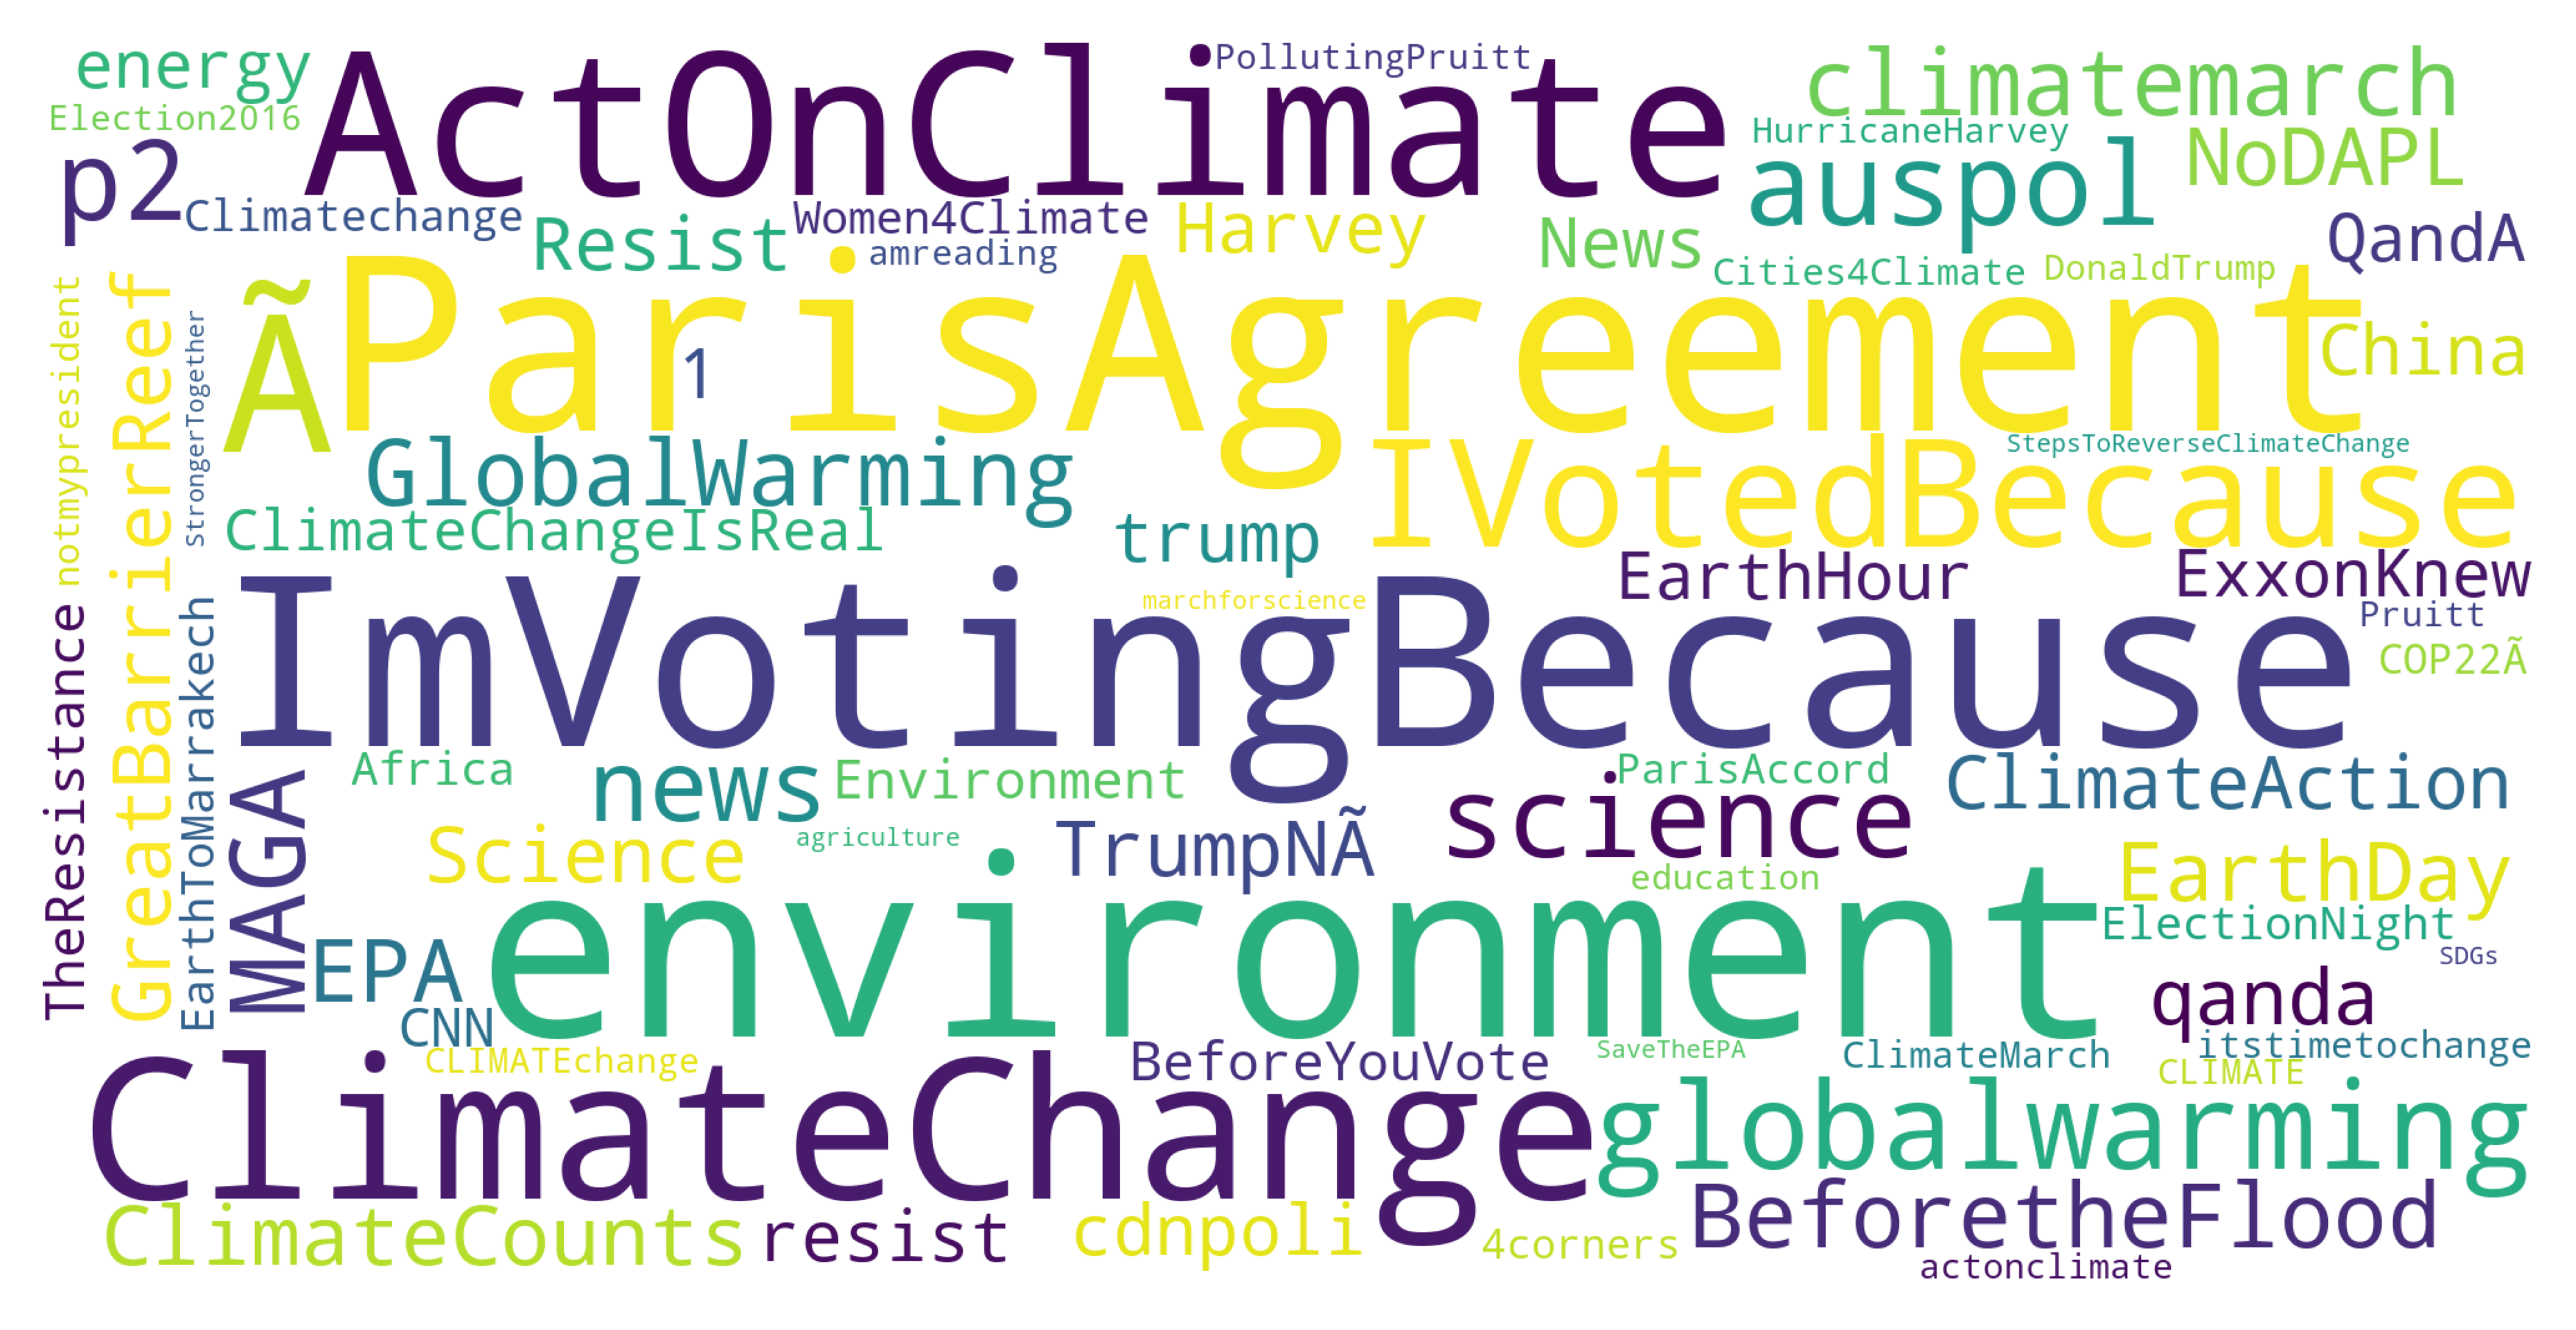

In [36]:
generate_wordcloud(hashtags_popular)
plt.savefig('a_popularhashtags.png')

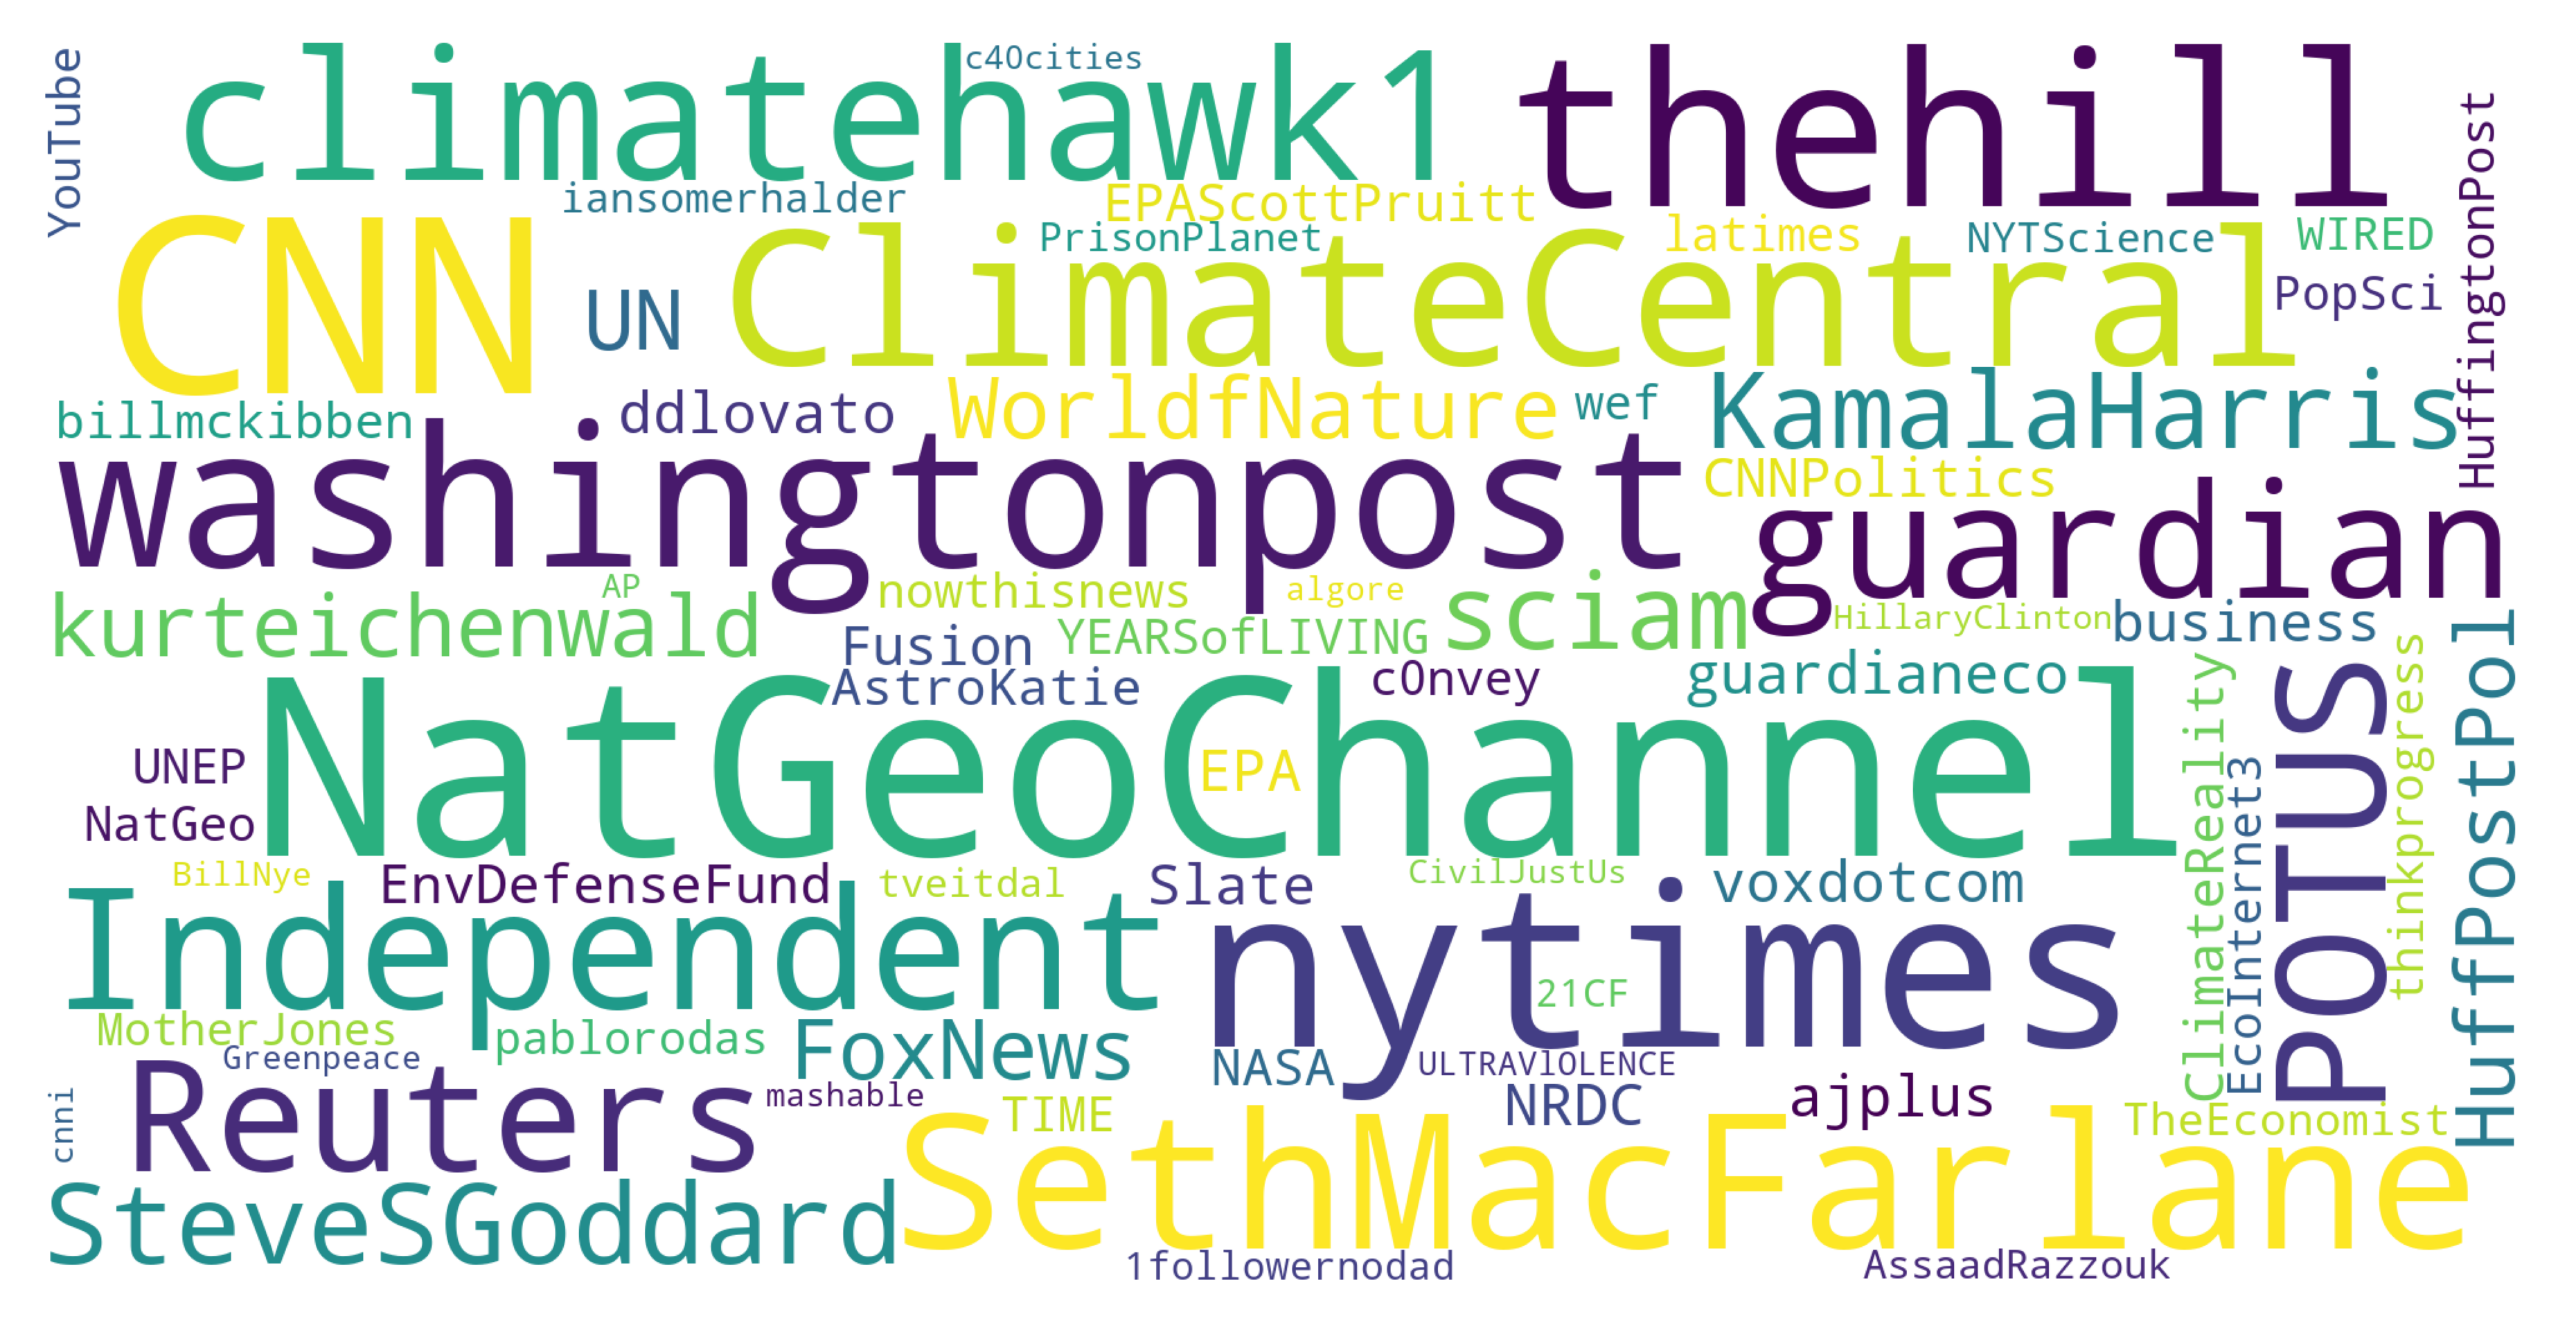

In [37]:
generate_wordcloud(mentions_popular)
plt.savefig('a_popularmentions.png')

####
####
## Now we switching gears, we moving to the most common words in the twitter messages
####
####

In [38]:
import nltk 
nltk.download('punkt')

reviews = ''

for review in df['clean_message']:
    reviews += review

corpus = nltk.sent_tokenize(reviews)

[nltk_data] Downloading package punkt to C:\Users\Belutics (pty)
[nltk_data]     Ltd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [40]:
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys())]

In [41]:
corpus.sort(reverse = True)
corpus

[(12668, 'climate'),
 (10582, 'change'),
 (3621, 'global'),
 (3359, 'â'),
 (2792, 'warming'),
 (1830, 'trump'),
 (1323, 'ârt'),
 (1263, 'changert'),
 (1106, 'believe'),
 (906, 'u'),
 (729, 'say'),
 (646, 'going'),
 (638, 'ã'),
 (575, 'world'),
 (554, 'people'),
 (552, 'think'),
 (545, 'real'),
 (524, 'ha'),
 (496, 'new'),
 (480, 'scientist'),
 (454, 'warmingrt'),
 (442, 'epa'),
 (428, 'like'),
 (408, 'die'),
 (395, 'wa'),
 (386, 'science'),
 (356, 'year'),
 (349, 'denier'),
 (348, 'thinking'),
 (344, 'donald'),
 (333, 'right'),
 (332, 'need'),
 (324, 'know'),
 (322, 'make'),
 (316, 'hoax'),
 (313, 'husband'),
 (305, 'president'),
 (304, 'cause'),
 (297, 'action'),
 (292, 'want'),
 (286, 'could'),
 (278, 'viart'),
 (257, 'one'),
 (244, 'time'),
 (240, 'take'),
 (239, 'get'),
 (238, 'would'),
 (238, 'pruitt'),
 (237, 'china'),
 (233, 'stop'),
 (231, 'human'),
 (230, 'energy'),
 (217, 'å'),
 (217, 'issue'),
 (215, 'leader'),
 (214, 'thing'),
 (213, 'due'),
 (212, 'still'),
 (207, 'million

In [42]:
#lets take a look at the negative twitts
df_neg = df[df['negative'] > 0.4]
df_neg.head()

sentiment                                            message  tweetid  \
4   negative  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   
33  negative       Denying climate change ignores basic science    11622   
57  negative  RT @Dawn2334Dawn: This is ONE of Arnold Schwar...   768263   
94  negative  @CNN Its a protest against global warming. The...   614812   
96  negative  RT @savingoceans: Lack of #climate change acti...   695439   

                                        clean_message    comp  positive  \
4   rt racist sexist climate change denying bigot ... -0.7506       0.0   
33       denying climate change ignores basic science -0.5423       0.0   
57  rt one arnold vehicle whining climate change m... -0.6705       0.0   
94                      protest global warming stupid -0.5859       0.2   
96  rt lack climate change action potentially hurt... -0.6908       0.0   

    negative  neutral            hashtags  
4      0.444    0.556       ElectionNight  
33     0.529    0.471                      
57     0.407    0.593                      
94     0.675    0.125                      
96     0.416    0.584  climate, fishermen

#### Lets dig a little bigger to see what are those popular negative hashtags

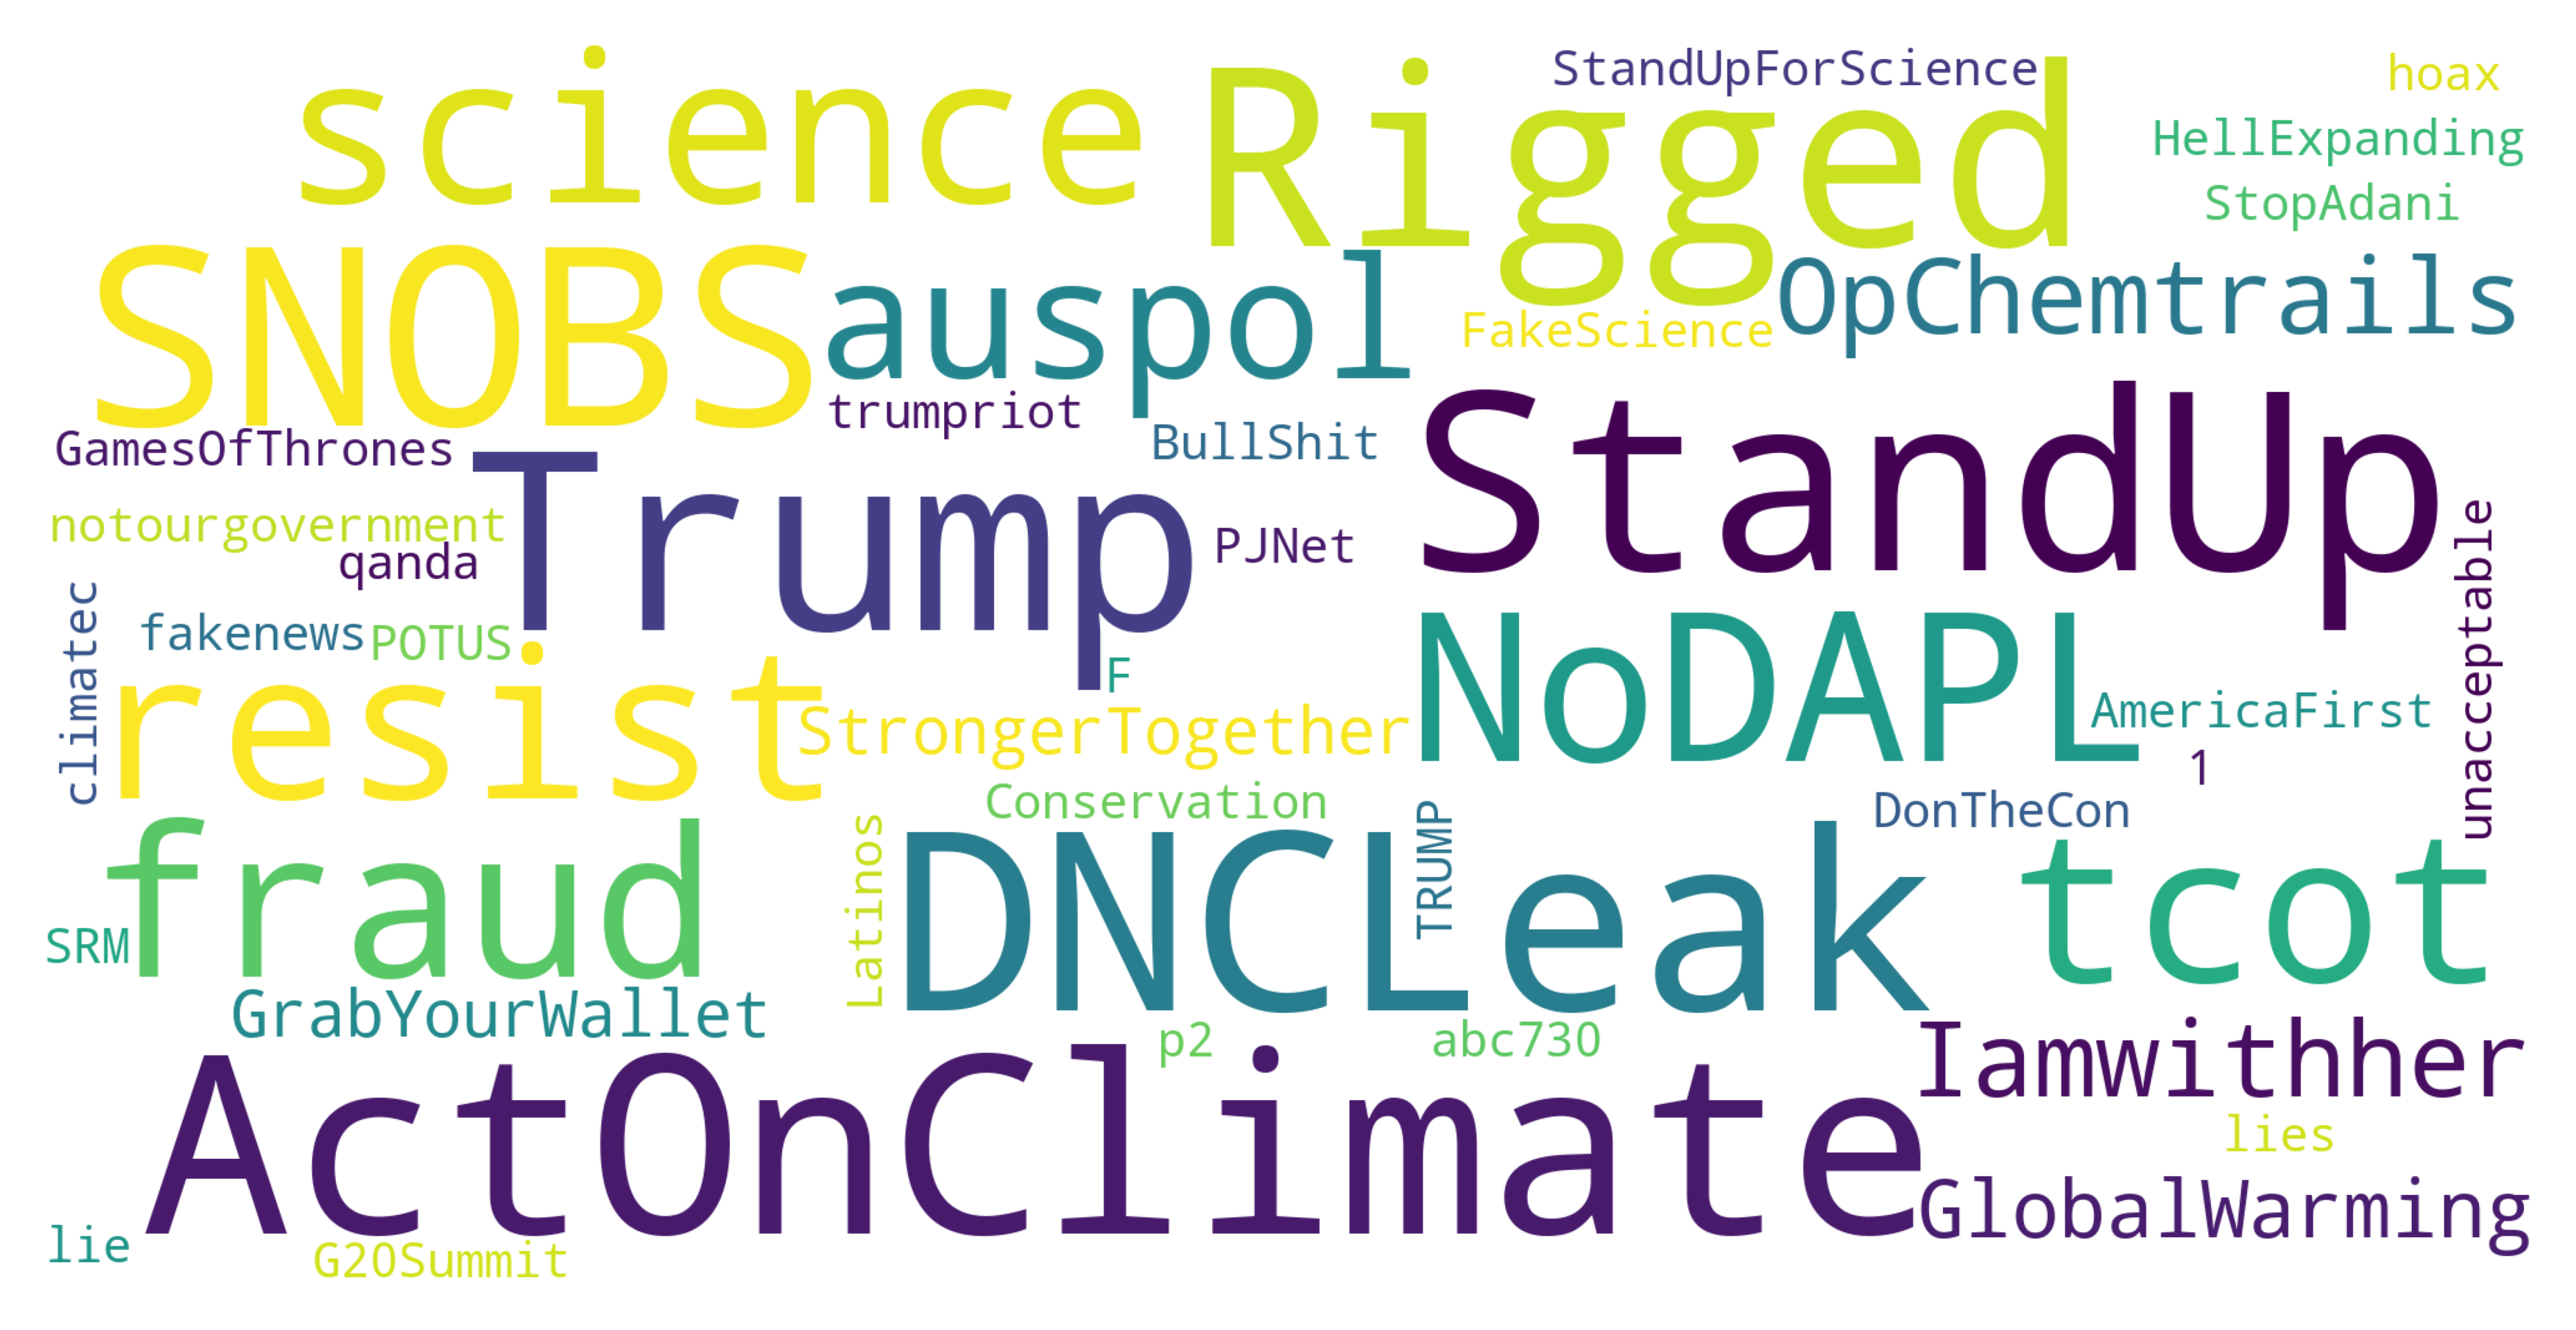

In [43]:
#Popular negative hashtags
hashtags_popular_neg = df_neg.message.str.extractall(r'\#(\w*)')[0].value_counts().nlargest(50)

generate_wordcloud(hashtags_popular_neg)
plt.savefig('a_neg_popularhashtags.png')

#### Since we have extracted the negatives, lets now move to popular positive hashtags

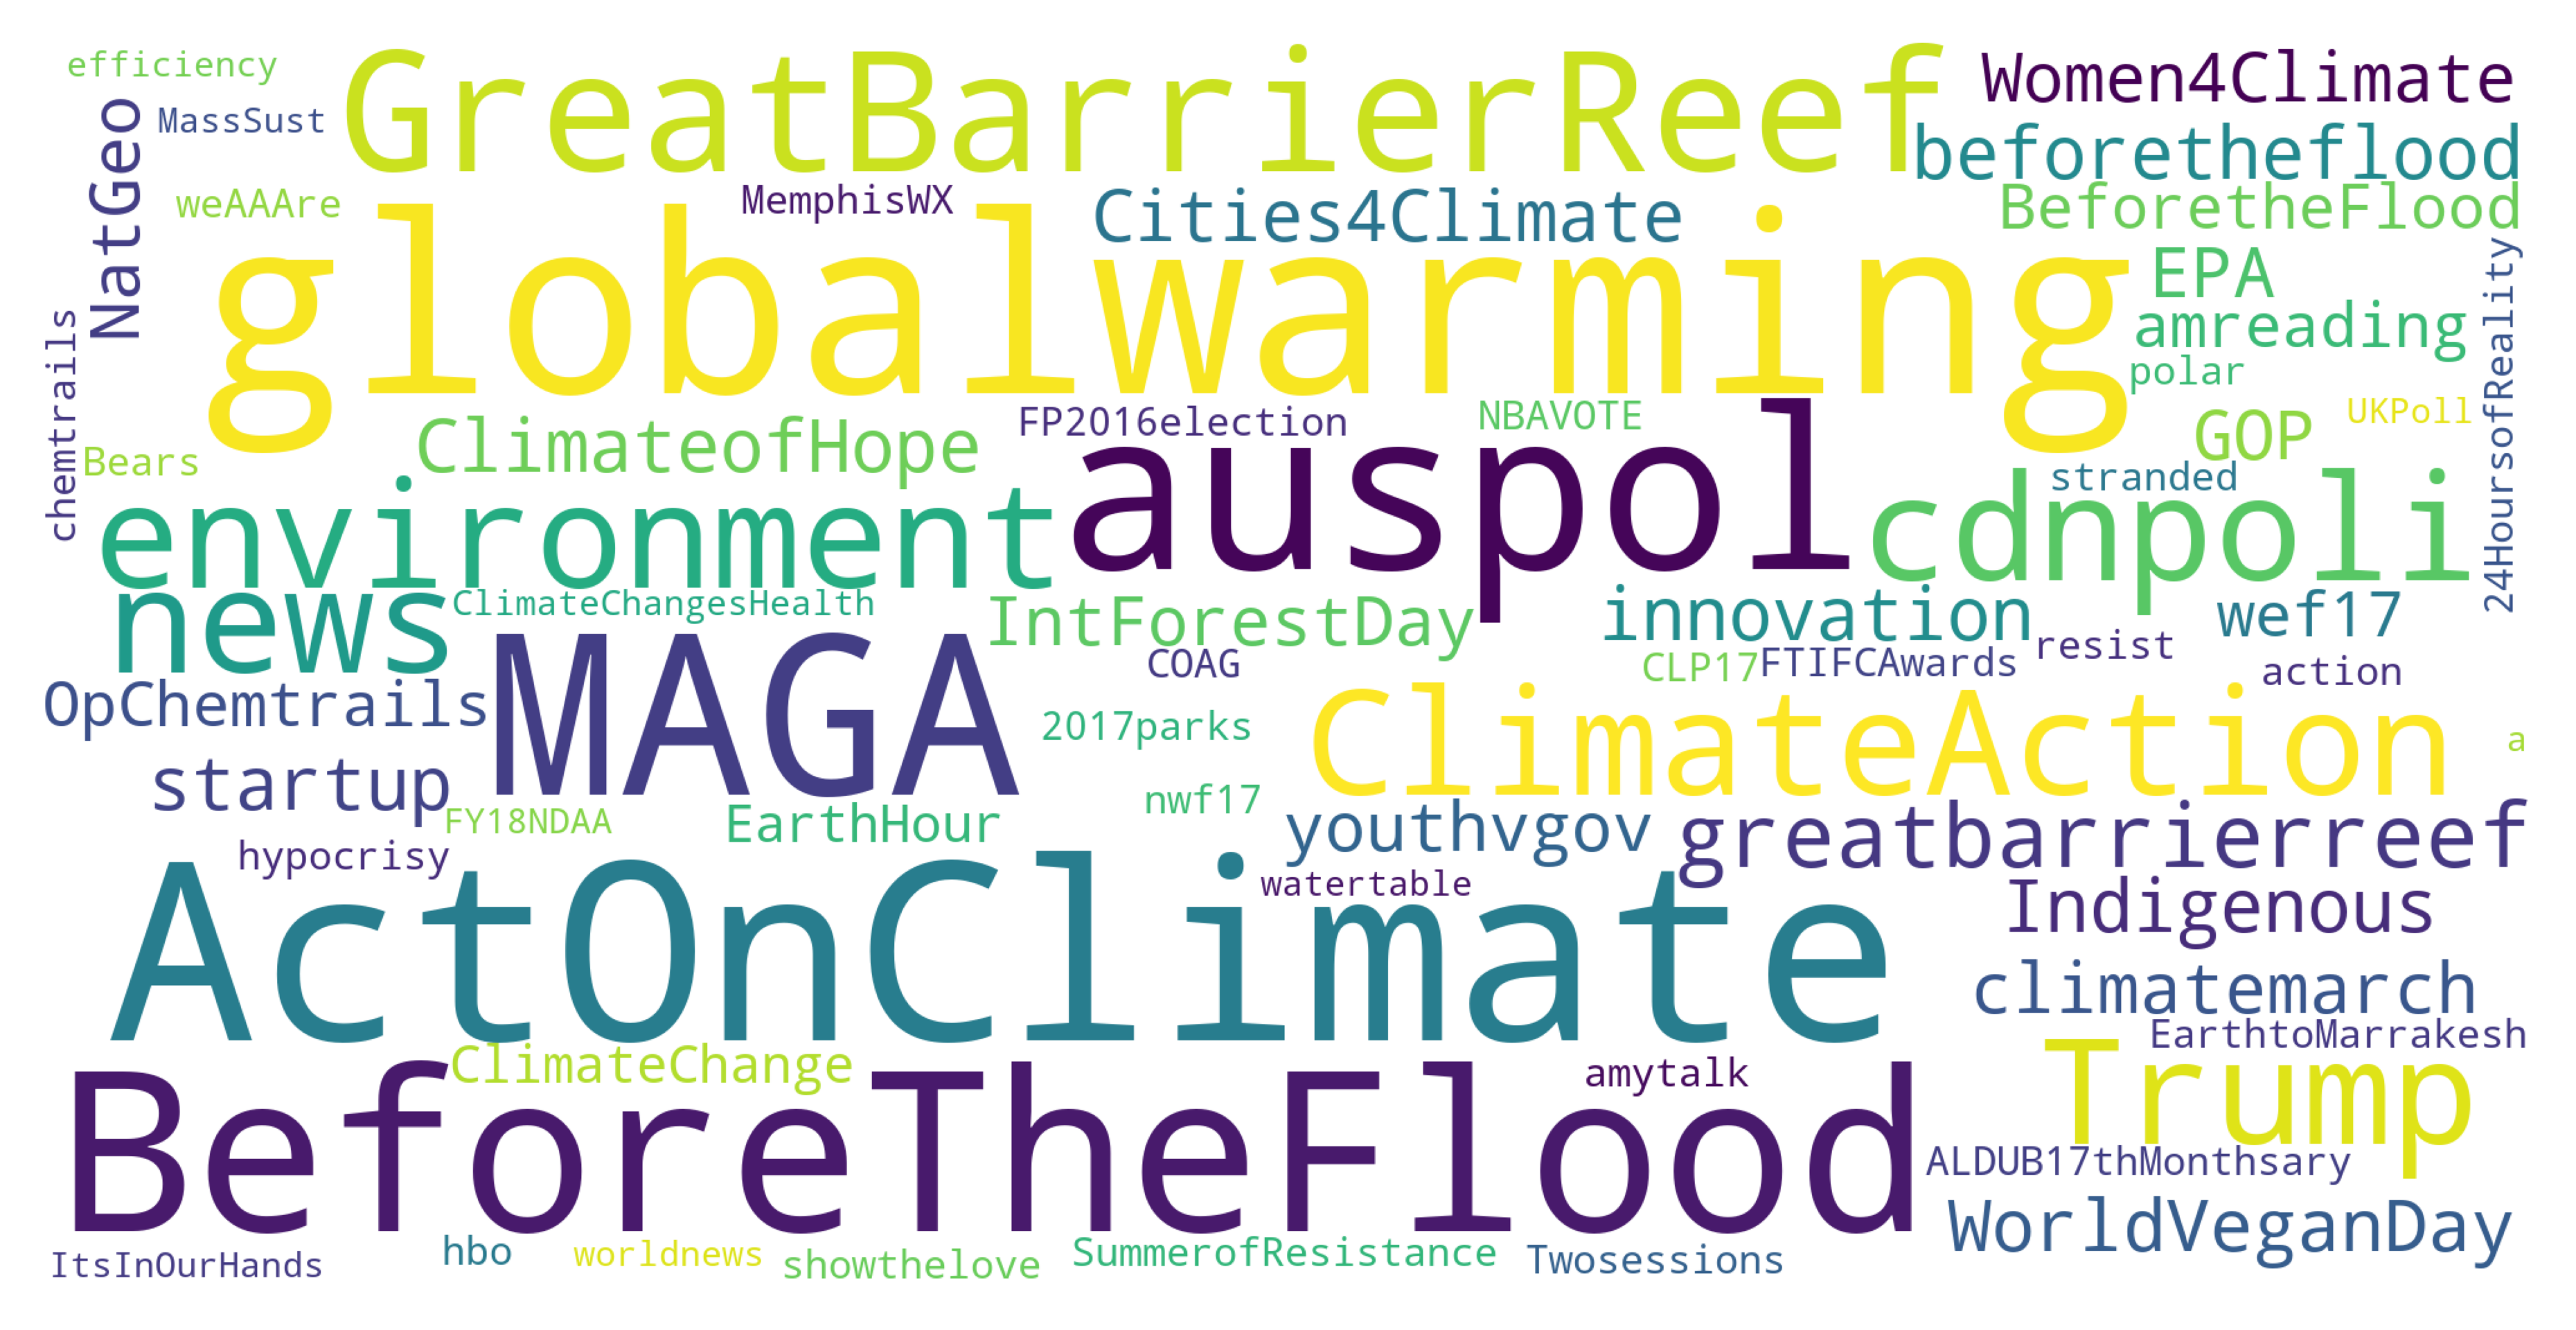

In [44]:
df_pos = df[df['positive'] > 0.3]

hashtags_popular_pos = df_pos.message.str.extractall(r'\#(\w*)')[0].value_counts().nlargest(70)

generate_wordcloud(hashtags_popular_pos)
plt.savefig('a_pos_popularhashtags.png')

In [ ]:
# Add some more preprocessing

# 3. Data Preprocessing

### Now that our data is about to be ready for analysis, lets get a bit deeper by dividing the texts in to words. And to do that, we must tokenize.

In [45]:
import nltk # for text manipulation
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Belutics (pty)
[nltk_data]     Ltd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

A tokeniser divides text into a sequence of tokens.

In [46]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

train_df['clean_message'] = train_df['clean_message'].apply(lemmatize_text)
test_df['clean_message'] = test_df['clean_message'].apply(lemmatize_text)

Now that we've tokenize the data lets now prepare it for analysis, this is by dividing our predictions and messages 

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [48]:
X = train_df['clean_message']
y = train_df['sentiment']

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

X_train,X_val,y_train,y_val = train_test_split(X_vectorized,y,test_size=0.1,shuffle=True, stratify=y, random_state=42)

# 4. Models

In [49]:
# some Important packages for models
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn import tree



# insert some more packages wen adding models
from sklearn.metrics import f1_score
import re # for regular expressions
pd.set_option("display.max_colwidth", 200)
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Model 1:

In [50]:
model1 = LinearSVC()
model1.fit(X_train, y_train)
svc_pred = model1.predict(X_val)
f1_score(y_val, svc_pred, average="macro")

0.6172129136152449

## Model 2:

The class SGDClassifier implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification. Below is the decision boundary of a SGDClassifier trained with the hinge loss, equivalent to a linear SVM.

In [51]:
svm_sgd = SGDClassifier(loss='hinge', penalty='l2', max_iter=5, random_state=42)
svm_sgd.fit(X_train, y_train)
svm_sgd_pred = svm_sgd.predict(X_val)
f1_score(y_val, svm_sgd_pred, average="macro")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.584066315894001

## Model 3:

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_val)
f1_score(y_val, gbc_pred, average="macro")

0.29171216587327603

## Model 4:

DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of shape (n_samples, n_features) holding the training samples, and an array Y of integer values, shape (n_samples,), holding the class labels for the training samples:

In [57]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_val)
f1_score(y_val, clf_pred, average="macro")

0.5034704618128105

## Model 5:

Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

MLP trains on two arrays: array X of size (n_samples, n_features), which holds the training samples represented as floating point feature vectors; and array y of size (n_samples,), which holds the target values (class labels) for the training samples:

In [58]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_val)
f1_score(y_val, mlp_pred, average="macro")

0.17515400410677617

## Model 6:

In [61]:
from sklearn.calibration import CalibratedClassifierCV

ccc = CalibratedClassifierCV()
ccc.fit(X_train, y_train)
ccc_pred = ccc.predict(X_val)
f1_score(y_val, ccc_pred, average="macro")

0.5986570841174468

## Model 7:

In [64]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_val)
f1_score(y_val, forest_pred, average="macro")

0.5357788717620184

## Model 8:

In [65]:
from sklearn import svm

svm2 = svm.SVC()
svm2.fit(X_train, y_train)
svm2_pred = svm2.predict(X_val)
f1_score(y_val, svm2_pred, average="macro")

0.5576693680812534

## Model 9:

In [69]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf2 = AdaBoostClassifier()
clf2.fit(X_train, y_train)
clf2_pred = clf2.predict(X_val)
f1_score(y_val, clf2_pred, average="macro")

0.45784763855894534

# 5. Best model evaluation

# 5. Conclusion

# Submission to kaggle

In [53]:
testx = test_df['clean_message'] #also transform x_test
test_vect = vectorizer.transform(testx)

y_pred = model1.predict(test_vect) #predict model with transform test data

test_df['sentiment'] = y_pred
test_df.head()

message  \
0                    Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq   
1         Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj   
2  The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..   
3  @Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax   
4                                                             RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican   

   tweetid  \
0   169760   
1    35326   
2   224985   
3   476263   
4   872928   

                                                                       clean_message  \
0                                europe looking china make sure alone climate change   
1                   combine polling staffer climate change woman right fascist state   
2  scary unimpeachable evidence climate change already itstimetochange climatechange   
3                             putin got jill trump believe climate change think hoax   
4                         rt female orgasm cause global warming sarcastic republican   

     comp  positive  negative  neutral  sentiment  
0  0.1531     0.127     0.000    0.873          1  
1  0.2023     0.436     0.245    0.319          1  
2  0.0000     0.000     0.000    1.000          1  
3 -0.5994     0.000     0.358    0.642          1  
4 -0.7506     0.000     0.444    0.556          1

In [54]:
test_df[['tweetid','sentiment']].to_csv('Submission.csv', index=False) # create csv file that is align with competition format

In [55]:
pwd

'C:\\Users\\Belutics (pty) Ltd\\3D Objects\\Ndamu Explore Data Science\\Advanced Classification\\Advanced_Classification_Predict-student_data-2780'